# Estadistica en python

https://docs.scipy.org/doc/scipy/reference/stats.html

In [2]:
import scipy.stats as ss

Importemos alguna base de datos sobre la cual podamos aplicar las funciones de stats de scipy

In [5]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

df["target"] = data.target

In [10]:
df.target = df.target.replace({0:'setosa', 1:'versicolor', 2:'virginica'})

# Correlaciones entre variables

In [12]:
## Podemos calcular directamente una matriz de correlacion de pearson

df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Las funciones de stats nos entregan mas informacion, ademas hay una mayor cantidad de coeficientes disponibles

In [18]:
## Correlacion de Pearson

coef, p = ss.pearsonr(df["sepal length (cm)"], df["petal length (cm)"])

print(f"Coeficiente de correlacion de Pearson: {coef} // p-value: {p}")

Coeficiente de correlacion de Pearson: 0.8717537758865833 // p-value: 1.0386674194496954e-47


In [17]:
## Correlacion de Spearman

coef, p = ss.spearmanr(df["sepal length (cm)"], df["petal length (cm)"])

print(f"Coeficiente de correlacion de Spearman: {coef} // p-value: {p}")

Coeficiente de correlacion: 0.881898126434986 // p-value: 3.4430872780470036e-50


In [20]:
## Para correlacion entre una variable binaria y una continua, esta la correlacion de punto biserial

x = [0,1,0,0,1,0,1]
y = [5,10,2,3,17,2,18]

coef, p = ss.pointbiserialr(x, y)

print(f"Coeficiente de correlacion de punto biserial: {coef} // p-value: {p}")

Coeficiente de correlacion de punto biserial: 0.9212616274693874 // p-value: 0.003201477335157002


In [21]:
## Para variables ordinales (rankings) tenemos la correlacion de kendall-tau 

x1 = [12, 2, 1, 12, 2]
x2 = [1, 4, 7, 1, 0]

coef, p = ss.kendalltau(x1, x2)

print(f"Coeficiente de correlacion de kendall-tau: {coef} // p-value: {p}")

Coeficiente de correlacion de kendall-tau: -0.4714045207910316 // p-value: 0.2827454599327748


Hay mas coeficientes de correlacion, pueden revisarlos en: https://docs.scipy.org/doc/scipy/reference/stats.html#correlation-functions

# Tests estadisticos

In [22]:
import seaborn as sns

## Tests de normalidad

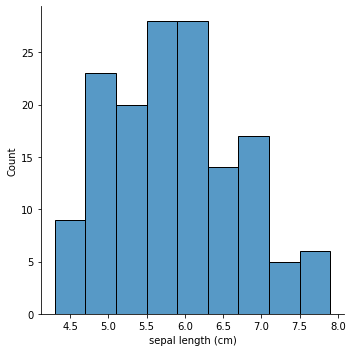

In [24]:
sns.displot(df["sepal length (cm)"])

In [25]:
ss.shapiro(df["sepal length (cm)"])

ShapiroResult(statistic=0.9760897755622864, pvalue=0.01017984002828598)

In [26]:
ss.anderson(df["sepal length (cm)"])

AndersonResult(statistic=0.8891994860134105, critical_values=array([0.562, 0.64 , 0.767, 0.895, 1.065]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [27]:
ss.normaltest(df["sepal length (cm)"])

NormaltestResult(statistic=5.735584236235733, pvalue=0.05682424941067306)

## Tests de independencia

<AxesSubplot:xlabel='target', ylabel='petal width (cm)'>

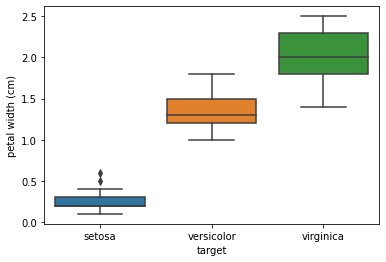

In [31]:
sns.boxplot(x=df["target"], y=df["petal width (cm)"])

In [36]:
x = df[df.target == "setosa"]["petal width (cm)"]
y = df[df.target == "versicolor"]["petal width (cm)"]
z = df[df.target == "virginica"]["petal width (cm)"]


print(ss.kruskal(x, y, z))
print(ss.kruskal(x, y))
print(ss.kruskal(x, z))
print(ss.kruskal(y, z))

KruskalResult(statistic=131.18537974024488, pvalue=3.261795552421968e-29)
KruskalResult(statistic=76.48851281607524, pvalue=2.2149765774516838e-18)
KruskalResult(statistic=76.36484810337485, pvalue=2.358116767974658e-18)
KruskalResult(statistic=69.0874427437059, pvalue=9.419318581124735e-17)
